## Fourier Transforms

* [FFT in images](https://plus.maths.org/content/fourier-transforms-images)
* [FFT in cv2](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html)

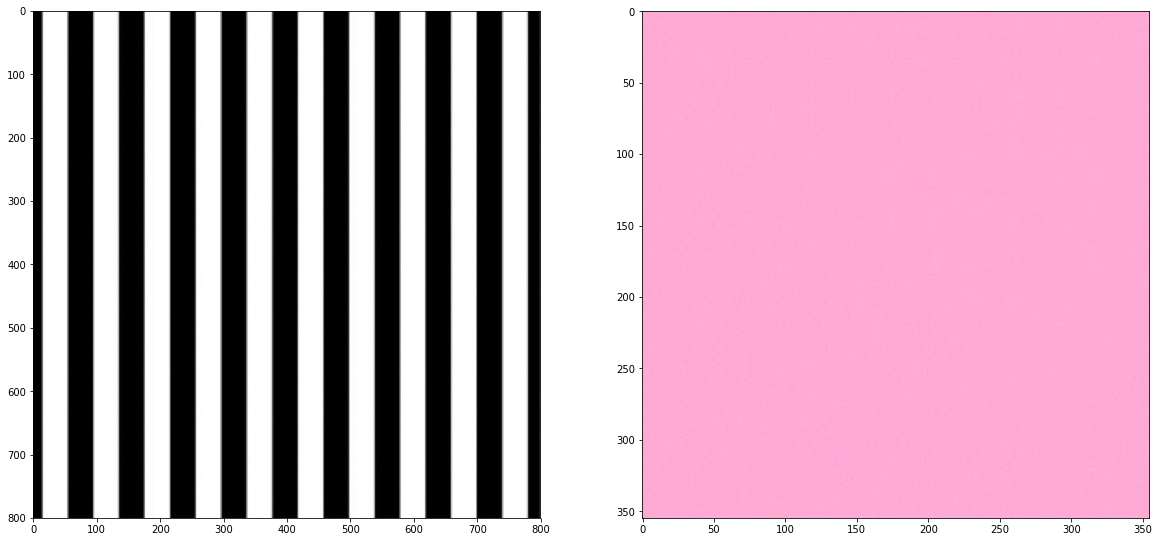

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

img_stripes = cv2.imread("images/stripes.jpg")
img_stripes = cv2.cvtColor(img_stripes, cv2.COLOR_BGR2RGB)

img_solid = cv2.imread("images/pink_solid.jpg")
img_solid = cv2.cvtColor(img_solid, cv2.COLOR_BGR2RGB)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))

ax1.imshow(img_stripes)
ax2.imshow(img_solid);

In [5]:
# Convert to grayscale and observe the intensity in the image
gray_stripes = cv2.cvtColor(img_stripes, cv2.COLOR_RGB2GRAY)
gray_solid = cv2.cvtColor(img_solid, cv2.COLOR_RGB2GRAY)

# Normalize values
norm_solid = gray_solid/255
norm_stripes = gray_stripes/255

# Fast fourier transform scaled, frequency transform image
def ft_image(norm_img):
    '''Input normalized grayscale image and returns the frequency spectrum transform of that image.'''
    f = np.fft.fft2(norm_img)
    fshift = np.fft.fftshift(f)
    freq_tx = 20*np.log(np.abs(fshift))
    
    return freq_tx

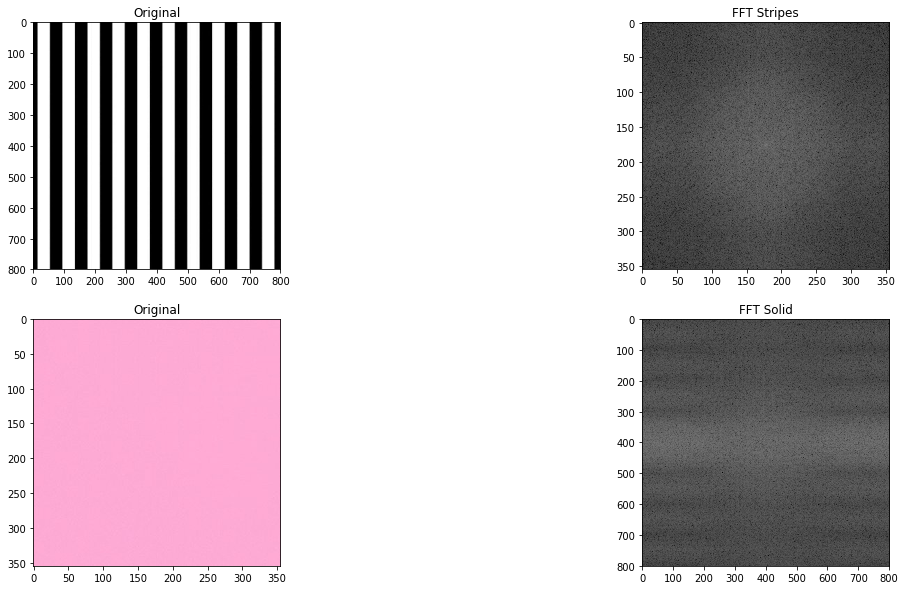

In [8]:
# Display FFT images

f_stripes = ft_image(norm_solid)
f_solid = ft_image(norm_stripes)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))

ax1.set_title("Original")
ax1.imshow(img_stripes)
ax2.set_title("FFT Stripes")
ax2.imshow(f_stripes, cmap="gray")

ax3.set_title("Original")
ax3.imshow(img_solid)
ax4.set_title("FFT Solid")
ax4.imshow(f_solid, cmap="gray");

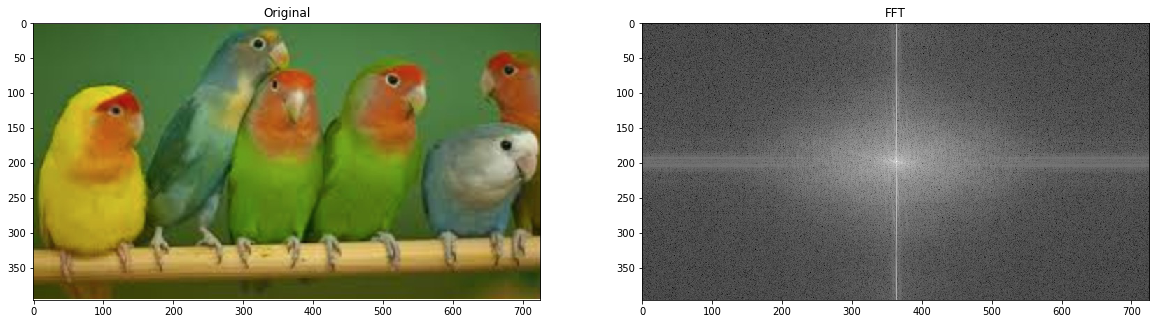

In [10]:
# Real world image

img = cv2.imread("images/birds.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
norm_img = gray/255

f_img = ft_image(norm_img)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.set_title('Original')
ax1.imshow(img)

ax2.set_title("FFT")
ax2.imshow(f_img, cmap="gray");